## New Dataformat - Captury

In [54]:
# load csv

import pandas as pd
import numpy as np

import torch
# load csv
csv_path = '/home/siyuan/research/PoseFall/src/utils/bone_rotations.csv'
df = pd.read_csv(csv_path)
body_joint = df.columns

In [55]:
new_order = [
    # "Spine",
    "LeftUpLeg",
    "RightUpLeg",
    "Spine1",
    "LeftLeg",
    "RightLeg",
    "Spine2",
    "LeftFoot",
    "RightFoot",
    "Spine3",
    "LeftToeBase",
    "RightToeBase",
    "Neck",
    "LeftShoulder",
    "RightShoulder",
    "Head",
    "LeftArm",
    "RightArm",
    "LeftForeArm",
    "RightForeArm",
    "LeftHand",
    "RightHand",
    "LeftHandEE",
    "RightHandEE",
]
SMPL_JOINT_NAMES = [
    # "pelvis",
    "left_hip",
    "right_hip",
    "spine1",
    "left_knee",
    "right_knee",
    "spine2",
    "left_ankle",
    "right_ankle",
    "spine3",
    "left_foot",
    "right_foot",
    "neck",
    "left_collar",
    "right_collar",
    "head",
    "left_shoulder",
    "right_shoulder",
    "left_elbow",
    "right_elbow",
    "left_wrist",
    "right_wrist",
    "left_hand",
    "right_hand",
]

In [56]:
print(len(new_order))
print(len(SMPL_JOINT_NAMES))

23
23


In [57]:
# for idx, (new , ref) in enumerate(zip(new_order, SMPL_JOINT_NAMES)):
#     print(idx, new, ref)

In [58]:
# for each new_order, append _x, _y, _z
new_col = []
for i in new_order:
    new_col.append(i + '_X')
    new_col.append(i + '_Y')
    new_col.append(i + '_Z')
new_col = np.array(new_col, dtype=object)
body_joint = np.array(body_joint)

difference = np.setdiff1d(body_joint, new_col)
redundent = difference[1:]
new_col = np.concatenate(( [difference[0]], new_col, redundent))
df = df[new_col]
# first frame
joint_rot = df.iloc[0,:][1:].values
joint_rot = joint_rot.reshape(-1, 3)
joint_rot = joint_rot[:23, :]
# convert radian to degree
joint_rot = np.rad2deg(joint_rot)
joint_rot = joint_rot.reshape(-1, 3)
# replace nan with zero
joint_rot = np.nan_to_num(joint_rot)    



In [59]:
for idx, (rot, joint_name) in enumerate(zip(joint_rot, SMPL_JOINT_NAMES)):
    print(f"idx: {idx}, {joint_name}: {rot}")

idx: 0, left_hip: [143.2486832  -65.602116    32.64616638]
idx: 1, right_hip: [ 92.97239155 -73.07920604  92.29375078]
idx: 2, spine1: [ -0.170875     1.36300192 -14.22313299]
idx: 3, left_knee: [-5.41966418 10.20958919 -6.57559387]
idx: 4, right_knee: [ 2.75961841  2.32326217 -7.58249865]
idx: 5, spine2: [-0.28217619  4.11080698  5.99383934]
idx: 6, left_ankle: [ -3.63916193 171.32944869  75.30605945]
idx: 7, right_ankle: [   3.39041839 -172.17949305   75.09435774]
idx: 8, spine3: [ 0.19818874  0.65797085 27.52167694]
idx: 9, left_foot: [  0.38315096   0.10270658 -14.76494629]
idx: 10, right_foot: [ -0.38027468  -0.20413657 -19.87096348]
idx: 11, neck: [  0.57005372  -1.51245671 -26.86868524]
idx: 12, left_collar: [ 90.13584131 -12.23799913  70.69237595]
idx: 13, right_collar: [-101.59489066   11.94526917   68.26939366]
idx: 14, head: [ -0.03194142  -3.23351892 -16.44486888]
idx: 15, left_shoulder: [-13.50418301  62.247653    52.88111065]
idx: 16, right_shoulder: [ 18.33821269 -67.873

In [60]:
print(len(SMPL_JOINT_NAMES))
print(len(joint_rot))

23
23


In [61]:

# joint_rot = np.zeros_like(joint_rot)
# print(joint_rot.shape)
# degree = -90
# # invert y
# # invert z
# blender_elbow = [0, degree,0]

# smplx_elbow = [blender_elbow[0], -blender_elbow[1], -blender_elbow[2]]
# smplx_elbow = np.deg2rad(smplx_elbow)
# # left elbow
# joint_rot[8, :] = smplx_elbow

# inverse y and z axis
# joint_rot[:, 1] = -joint_rot[:, 1]
# joint_rot[:, 2] = -joint_rot[:, 2]
joint_rot=torch.tensor(joint_rot).reshape(1, -1)
joint_rot = joint_rot.float()

joint_rot: torch.Size([1, 69])
model faces: (13776, 3)
vertices: (6890, 3)
plotting joints: (1, 45, 3)


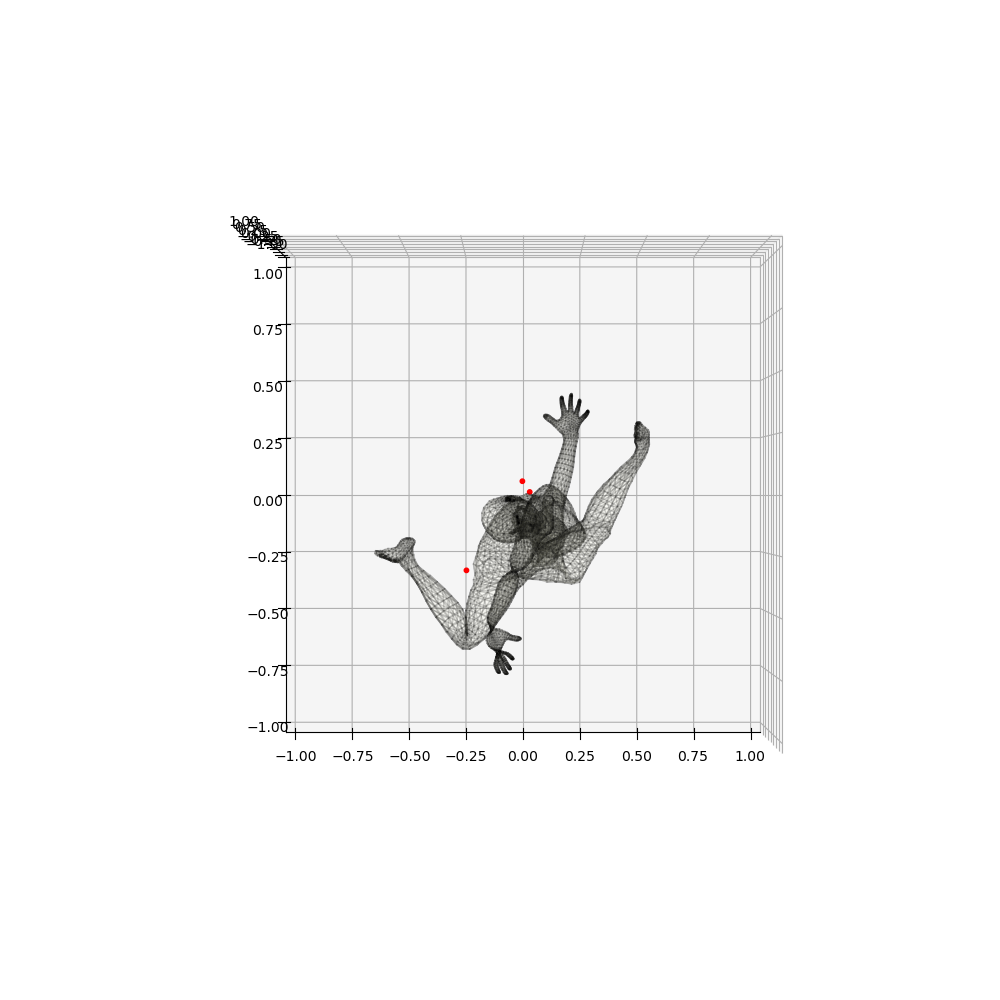

In [62]:
%matplotlib widget
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from pathlib import Path
import smplx, torch


VIZ_OUTPUT = '/home/siyuan/research/PoseFall/src/visulization/viz_output'
VIZ_OUTPUT = Path(VIZ_OUTPUT)

if not VIZ_OUTPUT.is_dir():
    VIZ_OUTPUT.mkdir()

# from smplx.joint_names import  JOINT_NAMES, SMPL_JOINT_NAMES 
model_folder= '/home/siyuan/research/PoseFall/data/SMPL_cleaned'
male_model = "/home/siyuan/research/PoseFall/data/SMPL_cleaned/SMPL_MALE.pkl"

human_model = smplx.SMPL(
    model_path = model_folder,
    create_body_pose=True,
    body_pose= None,
    create_betas=True,
    betas=None,
    gender='male',
)
print(f'joint_rot: {joint_rot.shape}')
output = human_model(body_pose=joint_rot, return_verts=True, return_full_pose=True)
vertices = output.vertices.detach().cpu().numpy()[0]
joints = output.joints.detach().cpu().numpy()
print(f'model faces: {human_model.faces.shape}')
print(f'vertices: {vertices.shape}')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=90., azim=-90., roll = 0)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
mesh = Poly3DCollection(vertices[human_model.faces], alpha=0.1)
face_color = (1.0, 1.0, 0.9)
edge_color = (0, 0, 0)
mesh.set_edgecolor(edge_color)
mesh.set_facecolor(face_color)
ax.add_collection3d(mesh)
# ax.scatter(joints[:, 0], joints[:, 1], joints[:, 2], color='r')
joints = joints[:24, :]
print(f'plotting joints: {joints.shape}')
ax.scatter(joints[:, 0], joints[:, 1], joints[:, 2], alpha=1, marker='o', color='r', s=10)
# plt.savefig(output_file, dpi=200)



# get all bones's rotation
mocap=bpy.context.scene.objects['Siyuan:Hips']
for bone in mocap.pose.bones:
    local_rot_mat = convert_global_rot_to_local_rot(bone)
    euler_rotation = local_rot_mat.to_euler('XYZ')
    print(bone.name, np.round(np.rad2deg(euler_rotation), 3))

# set all bones's rotation to zero
mocap=bpy.context.scene.objects['Siyuan:Hips']
for bone in mocap.pose.bones:
    bone.rotation_mode = 'XYZ'
    bone.rotation_euler = (0,0,0)


mocap=bpy.context.scene.objects['Siyuan:Hips']
armature_prefix = "Siyuan"
for bone_name in Captury_boens:
    bone_name = armature_prefix + ':' + bone_name
    # get the boen in armature
    bone = mocap.pose.bones[bone_name]
    # Get the local rotation 
    local_rot_mat = convert_global_rot_to_local_rot(bone)
    euler_rotation = local_rot_mat.to_euler()
    print(bone.name, np.round(np.rad2deg(euler_rotation), 3))


In [ ]:
import numpy as np
import bpy
def convert_global_rot_to_local_rot(bone):
    if bone.parent:
        return bone.parent.matrix.inverted() @ bone.matrix
    else:
        return bone.matrix


def get_global_rot(armature, bone):
    '''
    get global rotation of a bone
    output: global rotation of the bone

    @param armature: armature object
    @param bone: bone object that you need to get global rotation
    '''
    global_mat = armature.matrix_world @ bone.matrix
    return global_mat
    
# Setup up Mocap 
mocap_armature = bpy.context.scene.objects['Siyuan:Hips']

# setup up Smplex
smplx_armature = bpy.context.scene.objects['SMPL-female']

mocap_local_rot = {}
mpcap_global_rot = {}
for bone in mocap_armature.pose.bones:
    # record global rotation
    global_rot_mat = get_global_rot(mocap_armature, bone)
    mpcap_global_rot[bone.name] = np.round(np.rad2deg(global_rot_mat.to_euler('XYZ')), 3)
    # convert global rotation to local rotation
    local_rot_mat = convert_global_rot_to_local_rot(bone)
    euler_rotation = local_rot_mat.to_euler('XYZ')
    degree_euler_rot = np.round(np.rad2deg(euler_rotation), 3)
    mocap_local_rot[bone.name] = degree_euler_rot

smplx_local_rot = {}
smplx_global_rot = {}
for bone in smplx_armature.pose.bones:
    # record global rotation
    global_rot_mat = get_global_rot(smplx_armature, bone)
    smplx_global_rot[bone.name] = np.round(np.rad2deg(global_rot_mat.to_euler('XYZ')), 3)
    # convert global rotation to local rotation
    local_rot_mat = convert_global_rot_to_local_rot(bone)
    euler_rotation = local_rot_mat.to_euler('XYZ')
    degree_euler_rot = np.round(np.rad2deg(euler_rotation), 3)
    smplx_local_rot[bone.name] = degree_euler_rot

# compare a specific bone

mocap_bone_name = "Siyuan:RightUpLeg"
smplx_bone_name = "R_Hip"

mocap_bone = mocap_armature.pose.bones[mocap_bone_name]
smplx_bone = smplx_armature.pose.bones[smplx_bone_name]

# get their global rotation

mocap_global_rot = mpcap_global_rot[mocap_bone_name]
smplx_global_rot = smplx_global_rot[smplx_bone_name]

print(f'mocap_global_rot: {mocap_global_rot}')
print(f'smplx_global_rot: {smplx_global_rot}')



current progress: 
    1. we got gloabl rotation correct.
    2. However, SMPL and Captury has different bone orientation. Need to figure out a way to convert the rotation from Captury to SMPL.

In [ ]:
MOCAP_JOINT_NAME = [
    # "Spine",
    "LeftUpLeg",
    "RightUpLeg",
    "Spine1",
    "LeftLeg",
    "RightLeg",
    "Spine2",
    "LeftFoot",
    "RightFoot",
    "Spine3",
    "LeftToeBase",
    "RightToeBase",
    "Neck",
    "LeftShoulder",
    "RightShoulder",
    "Head",
    "LeftArm",
    "RightArm",
    "LeftForeArm",
    "RightForeArm",
    "LeftHand",
    "RightHand",
    "LeftHandEE",
    "RightHandEE",
]
SMPL_JOINT_NAMES = [
    # "pelvis",
    "left_hip",
    "right_hip",
    "spine1",
    "left_knee",
    "right_knee",
    "spine2",
    "left_ankle",
    "right_ankle",
    "spine3",
    "left_foot",
    "right_foot",
    "neck",
    "left_collar",
    "right_collar",
    "head",
    "left_shoulder",
    "right_shoulder",
    "left_elbow",
    "right_elbow",
    "left_wrist",
    "right_wrist",
    "left_hand",
    "right_hand",
]

In [ ]:
# Use this as the global orientation of 

Empty_orientation = bpy.data.objects['global_direction'].rotation_euler   
my_ori = [180, 0, -90]


# Setup up Mocap 
mocap_armature = bpy.context.scene.objects['Siyuan:Hips']
# setup up Smplex
smplx_armature = bpy.context.scene.objects['SMPL-female']

# right hip:
mocap_bone_name = "Siyuan:RightLeg"
smplx_bone_name = "R_Hip"

mocap_bone = mocap_armature.pose.bones[mocap_bone_name]
smplx_bone = smplx_armature.pose.bones[smplx_bone_name]

# set bones to the same global orientation

def set_bone_to_global_orientation(armature, bone, world_rotation):
    if bone.parent:
        # Get the parent's world transformation matrix
        parent_matrix_world = armature.matrix_world @ bone.parent.matrix
        # Invert the parent's world matrix to transform back into its local space
        parent_matrix_world_inv = parent_matrix_world.inverted()
        # Convert the world rotation to the parent's local space
        bone_rotation_local = parent_matrix_world_inv @ world_rotation.to_matrix().to_4x4()
        # Now, bone_rotation_local is a 4x4 transformation matrix in the parent's local space
        # To apply this to the bone, you need to extract the rotation component
        local_rotation = bone_rotation_local.to_euler("XYZ")
        print(f'local_rotation_quat: {local_rotation}')
        # Apply this local rotation to the bone
        bone.rotation_euler = local_rotation
    else:
        # If the bone has no parent, then its local space is the same as its world space
        # So we can just apply the world rotation directly
        bone.rotation_euler = world_rotation


# set mocap bone to global orientation
set_bone_to_global_orientation(mocap_armature, mocap_bone, Empty_orientation)

In [ ]:
MOCAP_JOINT_NAME = [
    # "Spine",
    "LeftUpLeg",
    "RightUpLeg",
    "Spine1",
    "LeftLeg",
    "RightLeg",
    "Spine2",
    "LeftFoot",
    "RightFoot",
    "Spine3",
    "LeftToeBase",
    "RightToeBase",
    "Neck",
    "LeftShoulder",
    "RightShoulder",
    "Head",
    "LeftArm",
    "RightArm",
    "LeftForeArm",
    "RightForeArm",
    "LeftHand",
    "RightHand",
    "LeftHandEE",
    "RightHandEE",
]

SMPL_JOINT_NAMES = [
    # "pelvis",
    "L_Hip",
    "R_Hip",
    "Spine1",
    "L_Knee",
    "R_Knee",
    "Spine2",
    "L_Ankle",
    "R_Ankle",
    "Spine3",
    "L_Foot",
    "R_Foot",
    "Neck",
    "L_Collar",
    "R_Collar",
    "Head",
    "L_Shoulder",
    "R_Shoulder",
    "L_Elbow",
    "R_Elbow",
    "L_Wrist",
    "R_Wrist",
    "L_Hand",
    "R_Hand",
]


actor_name = 'Siyuan'
MOCAP_JOINT_NAME = [ f'{actor_name}:{name}' for name in MOCAP_JOINT_NAME]
# calculate the transformation matrix from mocap bone to smplx bone
# def calculate_bone_trans_matrix(mocap_armature_name, simplex_armature_name, mocap_jont_name, smplx_joint_name):
#     '''
#     calculate the rotation matrix needed to transform mocap bone to smplx bone
#     output: rotation matrix from mocap bone to smplx bone
    
#     @param mocap_armature_name: mocap armature name
#     @param simplex_armature_name: smplx armature name
#     '''
#     mocap_armature = bpy.context.scene.objects[mocap_armature_name]
#     smplx_armature = bpy.context.scene.objects[simplex_armature_name]
#     trans_mat_dict = {}
#     for mocap_bone, smplx_bone in zip(mocap_jont_name, smplx_joint_name):
#         print(f'processing: {mocap_bone}, {smplx_bone}')
#         mocap_bone = mocap_armature.pose.bones[mocap_bone]
#         smplx_bone = smplx_armature.pose.bones[smplx_bone]
#         # get global rotation matrices in world space
#         mocap_bone_rot_matrix_world = mocap_armature.matrix_world.to_3x3() @ mocap_bone.matrix.to_3x3()
#         smplx_bone_rot_matrix_world = smplx_armature.matrix_world.to_3x3() @ smplx_bone.matrix.to_3x3()
#         # calculate the rotation matrix from mocap bone to smplx bone
#         mocap_to_smplx_rot_matrix = mocap_bone_rot_matrix_world.inverted() @ smplx_bone_rot_matrix_world
#         trans_mat_dict[mocap_bone.name] = mocap_to_smplx_rot_matrix
#     return trans_mat_dict
def calculate_bone_trans_matrix(mocap_armature_name, smplx_armature_name, mocap_bone_name, smplx_bone_name):
    '''
    calculate the ration matrix needed to aligh the rotation of mocap bone to smplx bone

    @param mocap_armature_name: mocap armature name
    @param smplx_armature_name: smplx armature name
    @param mocap_bone_name: mocap bone name
    @param smplx_bone_name: smplx bone name
    '''
    mocap_armature = bpy.context.scene.objects[mocap_armature_name]
    smplx_armature = bpy.context.scene.objects[smplx_armature_name]
    mocap_bone = mocap_armature.pose.bones[mocap_bone_name]
    smplx_bone = smplx_armature.pose.bones[smplx_bone_name]
    # get the bone'sd rest pose matrices in global space
    mocap_bone_rest_matrix_world = mocap_armature.matrix_world @ mocap_bone.bone.matrix_local
    smplx_bone_rest_matrix_world = smplx_armature.matrix_world @ smplx_bone.bone.matrix_local
    # conver tot rotation matrix
    mocap_bone_rest_rot_matrix_world = mocap_bone_rest_matrix_world.to_3x3()
    smplx_bone_rest_rot_matrix_world = smplx_bone_rest_matrix_world.to_3x3()
    # calculate the inverse of bone mocap's global rotation matrix
    mocap_bone_rest_rot_matrix_world_inv = mocap_bone_rest_rot_matrix_world.inverted()
    # calculate the rotation matrix from mocap bone to smplx bone
    mocap_to_smplx_rot_matrix = mocap_bone_rest_rot_matrix_world_inv @ smplx_bone_rest_rot_matrix_world
    return mocap_to_smplx_rot_matrix


# Setup up Mocap 
mocap_armature = bpy.context.scene.objects['Siyuan:Hips']
# setup up Smplex
smplx_armature = bpy.context.scene.objects['SMPL-female']
# get the transformation matrix from mocap bone to smplx bone
trans_mat_dict = calculate_bone_trans_matrix(mocap_armature.name, smplx_armature.name, MOCAP_JOINT_NAME, SMPL_JOINT_NAMES)

print(trans_mat_dict)


In [ ]:
MOCAP_JOINT_NAME = [
    # "Spine",
    "LeftUpLeg",
    "RightUpLeg",
    "Spine1",
    "LeftLeg",
    "RightLeg",
    "Spine2",
    "LeftFoot",
    "RightFoot",
    "Spine3",
    "LeftToeBase",
    "RightToeBase",
    "Neck",
    "LeftShoulder",
    "RightShoulder",
    "Head",
    "LeftArm",
    "RightArm",
    "LeftForeArm",
    "RightForeArm",
    "LeftHand",
    "RightHand",
    "LeftHandEE",
    "RightHandEE",
]

SMPL_JOINT_NAMES = [
    # "pelvis",
    "L_Hip",
    "R_Hip",
    "Spine1",
    "L_Knee",
    "R_Knee",
    "Spine2",
    "L_Ankle",
    "R_Ankle",
    "Spine3",
    "L_Foot",
    "R_Foot",
    "Neck",
    "L_Collar",
    "R_Collar",
    "Head",
    "L_Shoulder",
    "R_Shoulder",
    "L_Elbow",
    "R_Elbow",
    "L_Wrist",
    "R_Wrist",
    "L_Hand",
    "R_Hand",
]


actor_name = 'Siyuan'
MOCAP_JOINT_NAME = [ f'{actor_name}:{name}' for name in MOCAP_JOINT_NAME]
# Apply the transformation matrix to mocap armature
def get_global_rot(armature, bone):
    # '''
    # get global rotation of a bone
    # output: global rotation of the bone
    # @param armature: armature object
    # @param bone: bone object that you need to get global rotation
    # '''
    global_mat = armature.matrix_world @ bone.matrix
    return global_mat

def calculate_bone_trans_matrix(mocap_armature_name, smplx_armature_name, mocap_bone_name, smplx_bone_name):
    # '''
    # calculate the ration matrix needed to aligh the rotation of mocap bone to smplx bone
    # @param mocap_armature_name: mocap armature name
    # @param smplx_armature_name: smplx armature name
    # @param mocap_bone_name: mocap bone name
    # @param smplx_bone_name: smplx bone name
    # '''
    mocap_armature = bpy.context.scene.objects[mocap_armature_name]
    smplx_armature = bpy.context.scene.objects[smplx_armature_name]
    mocap_bone = mocap_armature.pose.bones[mocap_bone_name]
    smplx_bone = smplx_armature.pose.bones[smplx_bone_name]
    # get the bone'sd rest pose matrices in global space
    mocap_bone_rest_matrix_world = mocap_armature.matrix_world @ mocap_bone.bone.matrix_local
    smplx_bone_rest_matrix_world = smplx_armature.matrix_world @ smplx_bone.bone.matrix_local
    # conver tot rotation matrix
    mocap_bone_rest_rot_matrix_world = mocap_bone_rest_matrix_world.to_3x3()
    smplx_bone_rest_rot_matrix_world = smplx_bone_rest_matrix_world.to_3x3()
    # calculate the inverse of bone mocap's global rotation matrix
    mocap_bone_rest_rot_matrix_world_inv = mocap_bone_rest_rot_matrix_world.inverted()
    # calculate the rotation matrix from mocap bone to smplx bone
    mocap_to_smplx_rot_matrix = mocap_bone_rest_rot_matrix_world_inv @ smplx_bone_rest_rot_matrix_world
    return mocap_to_smplx_rot_matrix

def set_bone_to_global_orientation(armature, bone, world_rotation):
    if bone.parent:
        # Get the parent's world transformation matrix
        parent_matrix_world = armature.matrix_world @ bone.parent.matrix
        # Invert the parent's world matrix to transform back into its local space
        parent_matrix_world_inv = parent_matrix_world.inverted()
        # Convert the world rotation to the parent's local space
        bone_rotation_local = parent_matrix_world_inv @ world_rotation.to_matrix().to_4x4()
        # Now, bone_rotation_local is a 4x4 transformation matrix in the parent's local space
        # To apply this to the bone, you need to extract the rotation component
        local_rotation = bone_rotation_local.to_euler("XYZ")
        print(f'local_rotation_quat: {local_rotation}')
        # Apply this local rotation to the bone
        bone.rotation_euler = local_rotation
    else:
        # If the bone has no parent, then its local space is the same as its world space
        # So we can just apply the world rotation directly
        bone.rotation_euler = world_rotation

# right hip:
# mocap_bone_name = "Siyuan:RightLeg"
# smplx_bone_name = "R_Hip"
# Setup up Mocap 
mocap_armature = bpy.context.scene.objects['Siyuan:Hips']
# setup up Smplex
smplx_armature = bpy.context.scene.objects['SMPL-female']

# calculate for all bones:
for mocap_bone_name, smplx_bone_name in zip(MOCAP_JOINT_NAME, SMPL_JOINT_NAMES):
    mocap_bone = mocap_armature.pose.bones[mocap_bone_name]
    smplx_bone = smplx_armature.pose.bones[smplx_bone_name]
    # get the global transformation matrix of mocap bone
    curr_trans = calculate_bone_trans_matrix(mocap_armature.name, smplx_armature.name, mocap_bone.name, smplx_bone.name)
    # get the global rotation matrix of mocap bone
    mocap_bone_global_rot = get_global_rot(mocap_armature, mocap_bone).to_3x3()
    transformed_smpl_global_rot = mocap_bone_global_rot @ curr_trans
    # set the global rotation of smplx bone
    set_bone_to_global_orientation(smplx_armature, smplx_bone, transformed_smpl_global_rot.to_euler('XYZ'))
    